### Data preprocessing

In [1]:
# khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# df=pd.read_csv('D:/Runway-Training-main/BE/dataset/DATA-ROT.csv')
df=pd.read_csv('/Users/lap16291/Desktop/RunwayTraining/BE/dataset/DATA-ROT.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Exit-location   3811 non-null   float64
 1   Aircraft-type   3811 non-null   object 
 2   Final-approach  3811 non-null   int64  
 3   Exit-angle      3811 non-null   int64  
 4   Temperature     3811 non-null   int64  
 5   Time            3811 non-null   object 
 6   Windspeed       3811 non-null   int64  
 7   Visibility      3811 non-null   float64
 8   ROT             3810 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 268.1+ KB


In [4]:
# xóa duplicate
df.drop_duplicates(inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
# Giá trị đúng cần làm tròn
true_value = [1750, 2997.63, 2086.35]

# Tạo một danh sách mới để lưu giá trị thay đổi
updated_exit_location = []
hash_tabel={1750 : 'A',
            2086.35 : 'B'}
exit_label=[]

# Lặp qua từng giá trị của cột 'Exit-location'
for value in df['Exit-location']:
    # Kiểm tra và làm tròn giá trị theo 'true_value'
    found = False
    for i in true_value:
        if abs(value - i) < 5:
            updated_exit_location.append(i)
            exit_label.append(hash_tabel[i])
            found = True
            break
    # Nếu không khớp với bất kỳ giá trị nào, giữ nguyên giá trị ban đầu
    if not found:
        updated_exit_location.append(value)

# Gán lại danh sách đã cập nhật vào cột 'Exit-location'
df['Exit-location'] = updated_exit_location
df['Exit-label']=exit_label

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3779 entries, 0 to 3810
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Exit-location   3779 non-null   float64
 1   Aircraft-type   3779 non-null   object 
 2   Final-approach  3779 non-null   int64  
 3   Exit-angle      3779 non-null   int64  
 4   Temperature     3779 non-null   int64  
 5   Time            3779 non-null   object 
 6   Windspeed       3779 non-null   int64  
 7   Visibility      3779 non-null   float64
 8   ROT             3779 non-null   float64
 9   Exit-label      3779 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 324.8+ KB


In [8]:
df['Exit-location'].unique()

array([2086.35, 1750.  ])

In [9]:
df.describe()

,Exit-location,Final-approach,Exit-angle,Temperature,Windspeed,Visibility,ROT
count,3779.000000,3779.000000,3779.0,3779.000000,3779.000000,3779.000000,3779.000000
mean,1990.580590,137.692776,30.0,28.785658,-1.203493,8.069701,57.868748
std,151.810275,16.797287,0.0,3.153073,5.038983,1.378762,4.721825
min,1750.000000,50.000000,30.0,22.000000,-15.000000,3.200000,40.000000
25%,1750.000000,135.000000,30.0,26.000000,-5.000000,7.000000,55.000000
50%,2086.350000,141.000000,30.0,29.000000,-2.000000,8.000000,58.000000
75%,2086.350000,147.000000,30.0,31.000000,2.000000,9.000000,61.000000
max,2086.350000,176.000000,30.0,35.000000,12.000000,10.000000,77.000000


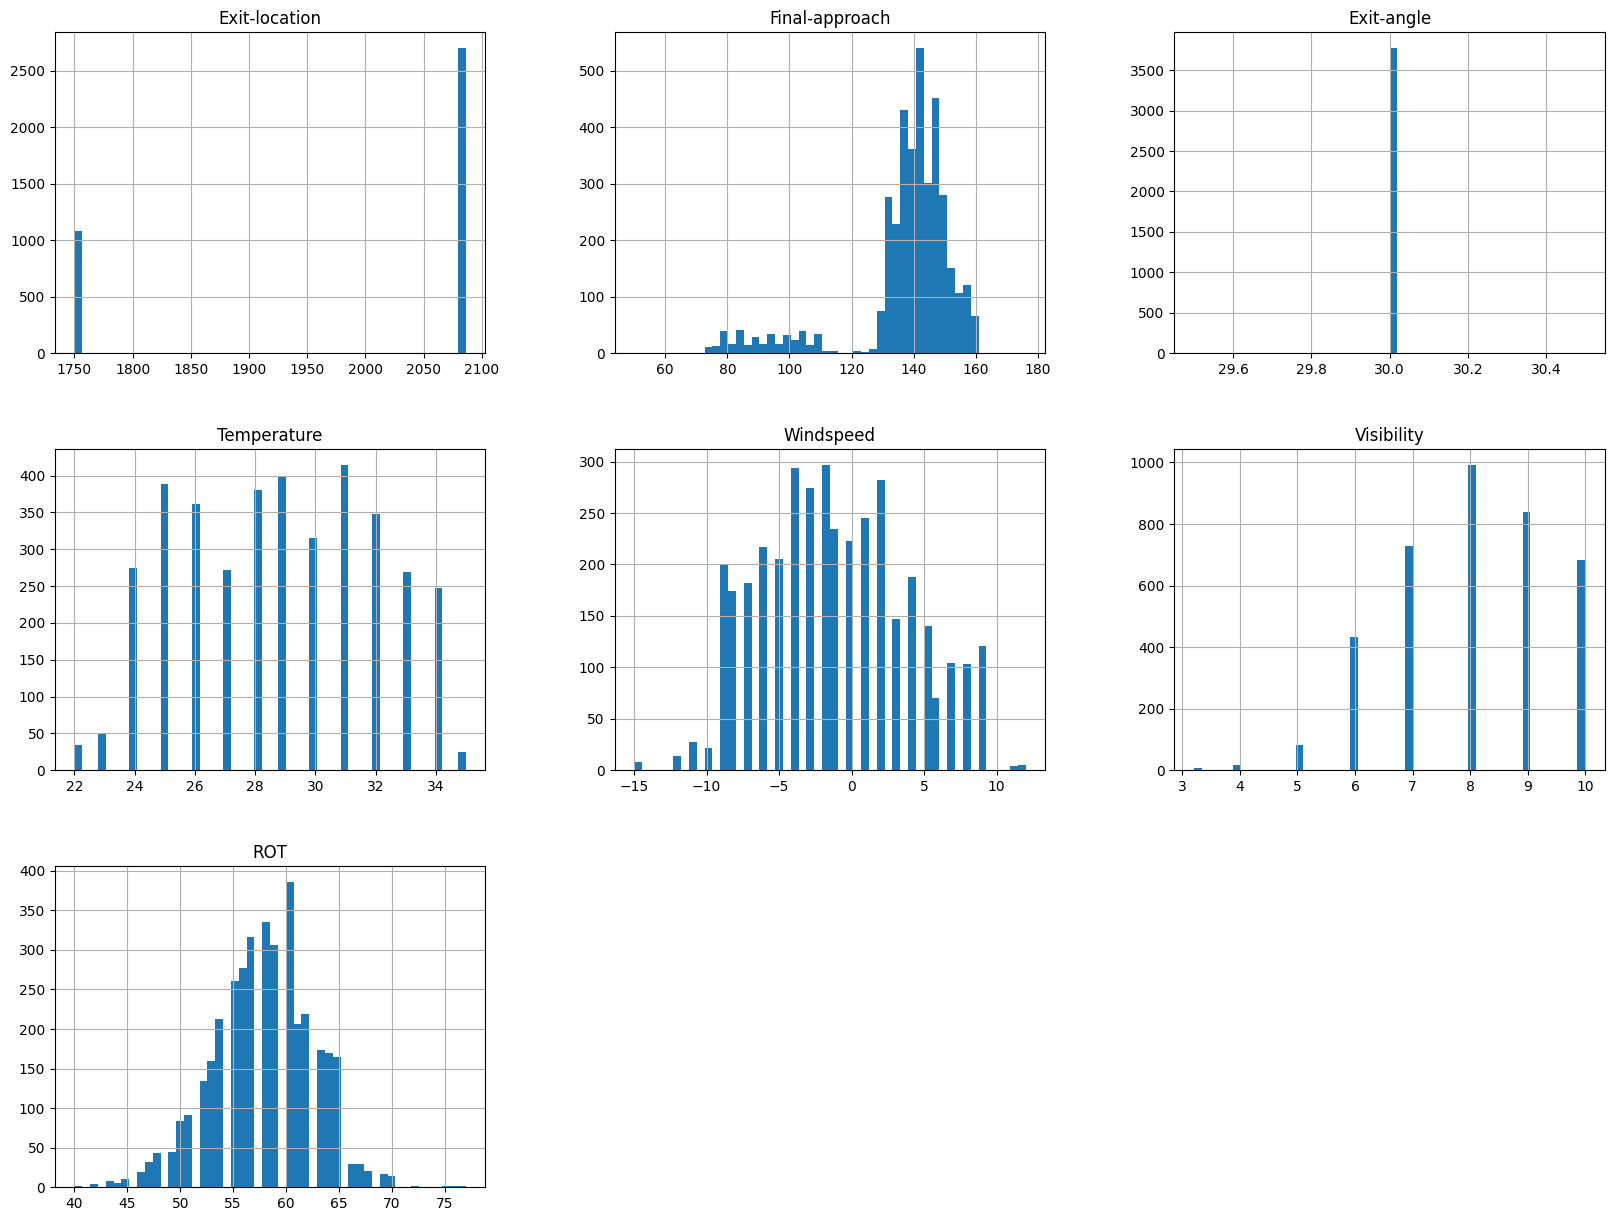

In [10]:
# kiểm tra phân phối dữ liệu
df.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
# encode các giá trị categorical
df_original=df.copy()
from sklearn.preprocessing import LabelEncoder
categorical_feature=['Aircraft-type','Time','Exit-label']
for feature in categorical_feature:
  le=LabelEncoder()
  df[feature]=le.fit_transform(df[feature])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3779 entries, 0 to 3810
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Exit-location   3779 non-null   float64
 1   Aircraft-type   3779 non-null   int64  
 2   Final-approach  3779 non-null   int64  
 3   Exit-angle      3779 non-null   int64  
 4   Temperature     3779 non-null   int64  
 5   Time            3779 non-null   int64  
 6   Windspeed       3779 non-null   int64  
 7   Visibility      3779 non-null   float64
 8   ROT             3779 non-null   float64
 9   Exit-label      3779 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 324.8 KB


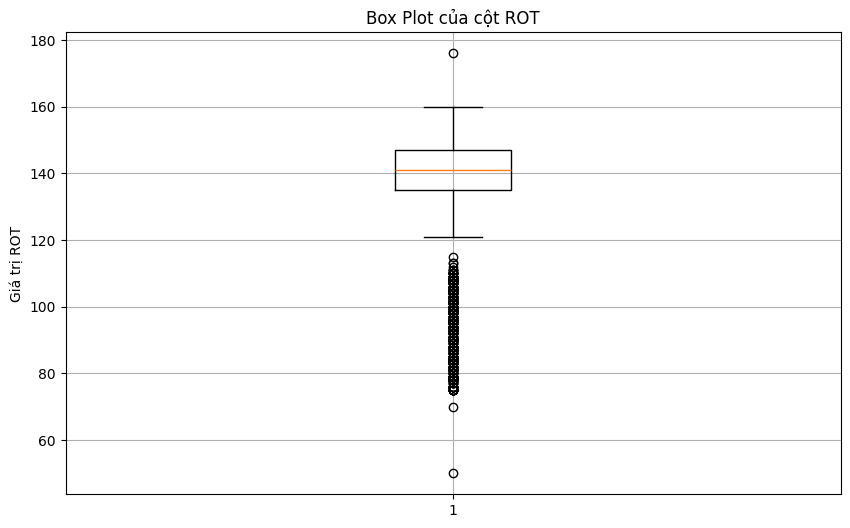

In [13]:
# vẽ box plot của cột ROT
plt.figure(figsize=(10, 6))
plt.boxplot(df['Final-approach'])
plt.title("Box Plot của cột ROT")
plt.ylabel("Giá trị ROT")
plt.grid()
plt.show()

In [14]:
import pandas as pd

# Giả sử df là DataFrame của bạn và cột cần lọc là 'Final-approach'
Q1 = df['Final-approach'].quantile(0.25)
Q3 = df['Final-approach'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc bỏ outliers
df_no_outlier = df[(df['Final-approach'] >= lower_bound) & (df['Final-approach'] <= upper_bound)]

print("Số lượng trước khi lọc:", len(df))
print("Số lượng sau khi lọc:", len(df_no_outlier))
print("Số lượng bị loại:", len(df) - len(df_no_outlier))

Số lượng trước khi lọc: 3779
Số lượng sau khi lọc: 3399
Số lượng bị loại: 380


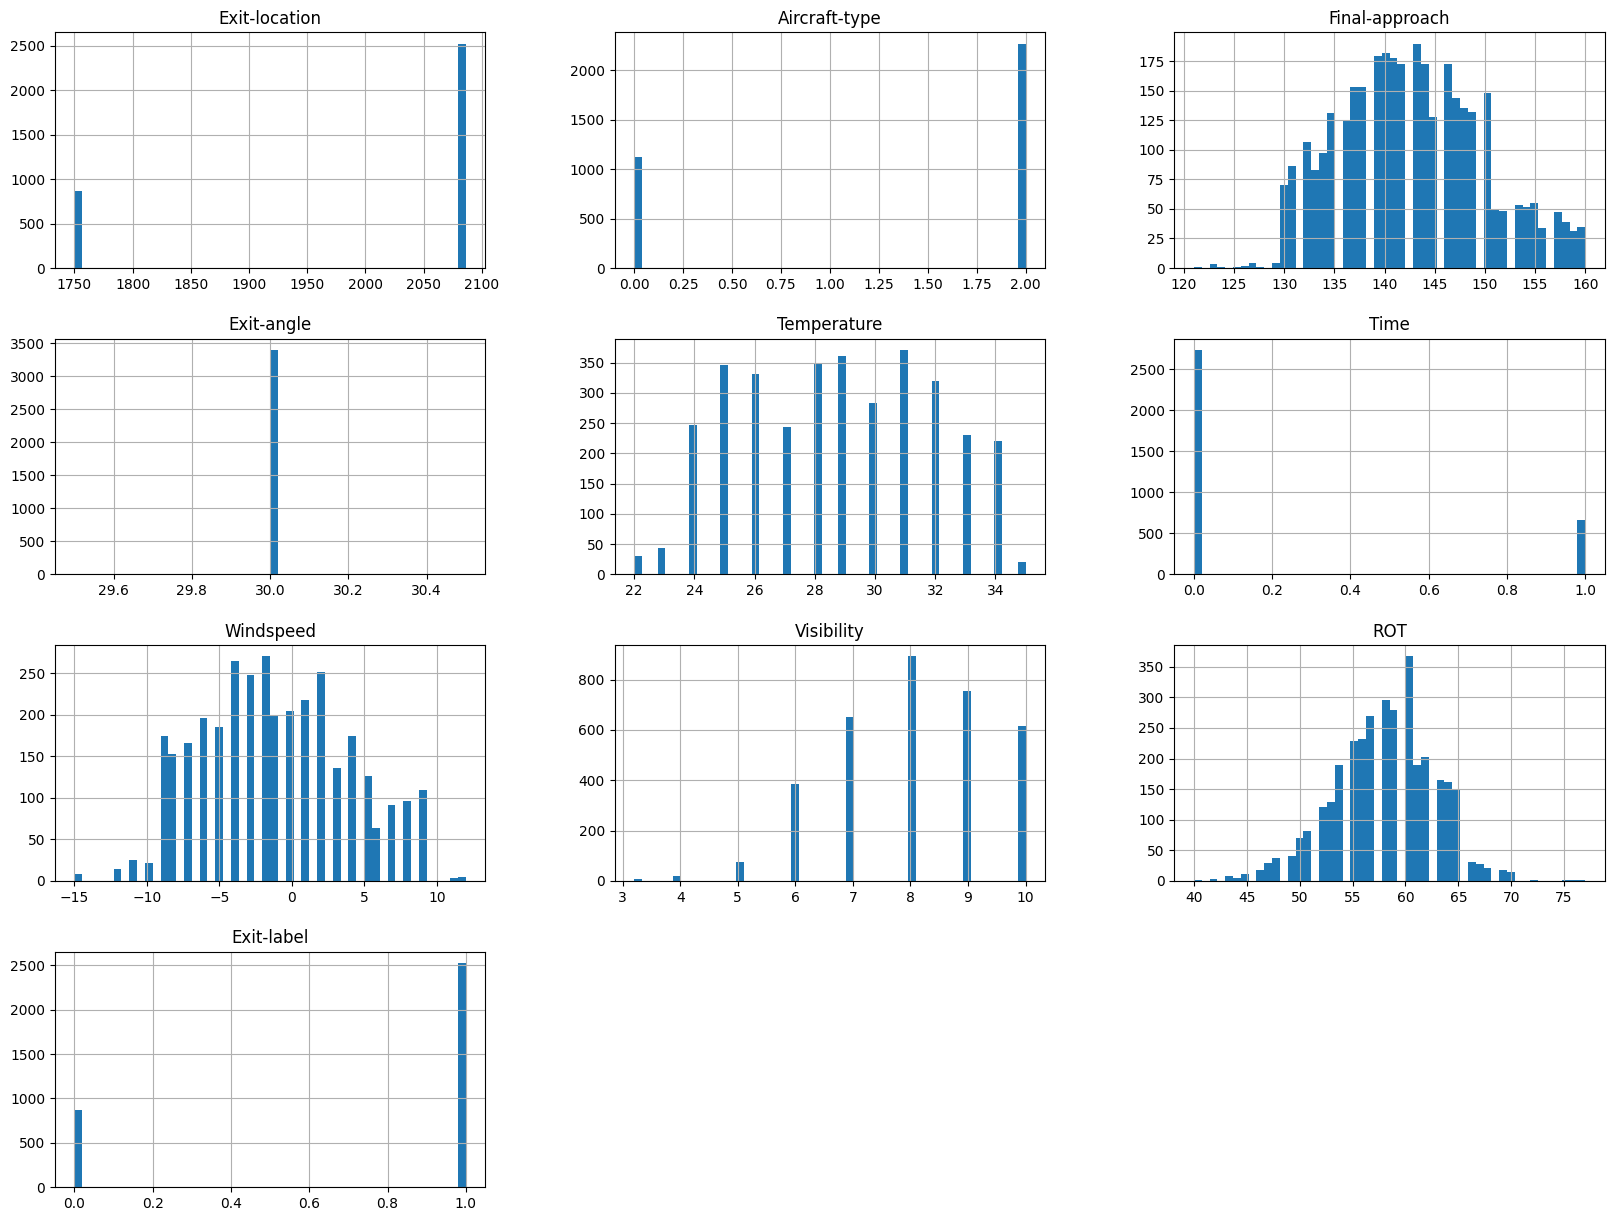

In [15]:
df = df_no_outlier.reset_index(drop=True)
df.hist(bins=50,figsize=(20,15))
plt.show()

In [16]:
df.reset_index(drop=True,inplace=True)


### RECURRENT NEURAL NETWORK for exit use

In [17]:
# Tạo dữ liệu
df = df.sample(frac=1).reset_index(drop=True)
aircraft_features=['Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
runway_feautures=['Exit-location','Exit-angle']
aircraft_df=df[aircraft_features]
runway_df=df[runway_feautures]

In [18]:
runway_df.drop_duplicates(inplace=True)
# sắp xếp lại theo giá trị của exit location
runway_df.sort_values(by='Exit-location',inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\3970589878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.drop_duplicates(inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\3970589878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.sort_values(by='Exit-location',inplace=True)


In [19]:
runway_df

,Exit-location,Exit-angle
3,1750.00,30
0,2086.35,30


In [20]:
aircraft_df.reset_index(drop=True,inplace=True)
runway_df.reset_index(drop=True,inplace=True)
# Số đặc trưng
n = runway_df.shape[1]
m = aircraft_df.shape[1]

# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (3399, 2, 8)
[[[ 1.75000e+03  3.00000e+01  1.42000e+02 ...  1.00000e+00 -2.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.42000e+02 ...  1.00000e+00 -2.00000e+00
    7.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00 -2.00000e+00
    9.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00 -2.00000e+00
    9.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    1.00000e+01]
  [ 2.08635e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    1.00000e+01]]

 ...

 [[ 1.75000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00 -3.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00 -3.00000e+00
    7.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.54000e+02 ...  1.00000e+00 -3.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.54000e+02 ...  1.00000e+00 -3.00000e+00
    7.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00  1.00

In [21]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
N,seq_len,M=array_3d.shape
data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)

# Chuẩn hóa dữ liệu
scaler_pro = StandardScaler()
data_normalized = scaler_pro.fit_transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d = data_normalized.reshape(N, seq_len, M)


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


num_samples = N  # Số lượng mẫu dữ liệu
seq_len = data_normalized_3d.shape[1]  # Độ dài chuỗi
input_dim = data_normalized_3d.shape[2]  # Số đặc trưng mỗi bước
output_dim = data_normalized_3d.shape[1]  # Số lớp cần phân loại
batch_size = 256  # Kích thước batch

X_tensor = torch.tensor(data_normalized_3d,dtype=torch.float32)
y_tensor = torch.tensor(df['Exit-label'], dtype=torch.long)  # Cần dtype=torch.long cho CrossEntropyLoss

# Chia tập train/test
train_size = int(0.8 * num_samples)
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# Tạo DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

class_counts = np.bincount(y_train.numpy())
class_weights = 1.0 / class_counts
weights = class_weights[y_train.numpy()]

# Tạo sampler
sampler = torch.utils.data.WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

# Tạo DataLoader với sampler
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [23]:
class LSTMPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim=30, output_dim=4):
        super(LSTMPredictor, self).__init__()
        self.hidden_dim = hidden_dim

        # Lớp LSTM
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)

        # Lớp Fully Connected
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Hàm Softmax sẽ được áp dụng trong loss function
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)  # lstm_out có shape (batch_size, seq_len, hidden_dim)
        lstm_out = torch.relu(lstm_out)  # Áp dụng ReLU
        output = self.fc(lstm_out)  # Lớp Fully Connected
        output = output[:, -1, :]  # Lấy output của bước cuối cùng
        score = self.softmax(output)
        return output,score  # Trả về logits (chưa áp dụng Softmax)

In [24]:
def train1(model, train_loader,test_loader,criterion,optimizer, batch_size,num_epochs=20):

  # Tạo sampler
  sampler = torch.utils.data.WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

  # Tạo DataLoader với sampler
  train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)

  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
  model.train()
  losses = {"train":[],"test":[]}
  # Khởi tạo mô hình, loss function và optimizer
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  # Huấn luyện mô hình
  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs*len(train_loader), eta_min=1e-5)
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0

      for X_batch, y_batch in train_loader:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)

          # Forward
          outputs,score = model(X_batch)  # (batch_size, seq_len, output_dim)

          # Reshape để tính loss: từ (batch, seq, output_dim) → (batch*seq, output_dim)
          loss = criterion(outputs.view(-1, output_dim), y_batch.view(-1))

          # Backward
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_loss += loss.item()
          scheduler.step()
      _,_,test_losses=evaluate_model(model,test_loader)
      losses["train"].append(total_loss/len(train_loader))
      losses["test"].append(test_losses)
      if epoch%10==0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")
  # visualize loss for each epoch
  plt.plot(losses["train"],label="train")
  plt.plot(losses["test"],label="test")
  plt.legend()
  plt.show()


In [25]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
def evaluate_model(model, test_loader):
  device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  model.eval()
  y_true, y_pred = [], []
  losses = 0
  with torch.no_grad():
      for X_batch, y_batch in test_loader:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)

          outputs,score = model(X_batch)  # (batch_size, seq_len, output_dim)
          predicted_labels = torch.argmax(score, dim=-1)  # Lấy nhãn có xác suất cao nhất
          loss = criterion(outputs.view(-1, output_dim), y_batch.view(-1))
          losses += loss.item()
          y_true.extend(y_batch.cpu().numpy().flatten())  # Flatten vì mỗi mẫu có seq_len nhãn
          y_pred.extend(predicted_labels.cpu().numpy().flatten())

  # Đánh giá bằng Accuracy
  accuracy = accuracy_score(y_true, y_pred)
  f1_score_macro = f1_score(y_true, y_pred, average='macro')
  print(classification_report(y_true,y_pred))
  return accuracy,f1_score_macro,losses/len(test_loader)


              precision    recall  f1-score   support

           0       0.37      0.99      0.53       161
           1       0.99      0.47      0.64       519

    accuracy                           0.59       680
   macro avg       0.68      0.73      0.59       680
weighted avg       0.84      0.59      0.61       680

Epoch [1/100], Loss: 0.6904
              precision    recall  f1-score   support

           0       0.29      1.00      0.46       161
           1       1.00      0.26      0.41       519

    accuracy                           0.43       680
   macro avg       0.65      0.63      0.43       680
weighted avg       0.83      0.43      0.42       680

              precision    recall  f1-score   support

           0       0.29      1.00      0.45       161
           1       1.00      0.24      0.39       519

    accuracy                           0.42       680
   macro avg       0.65      0.62      0.42       680
weighted avg       0.83      0.42      0.40   

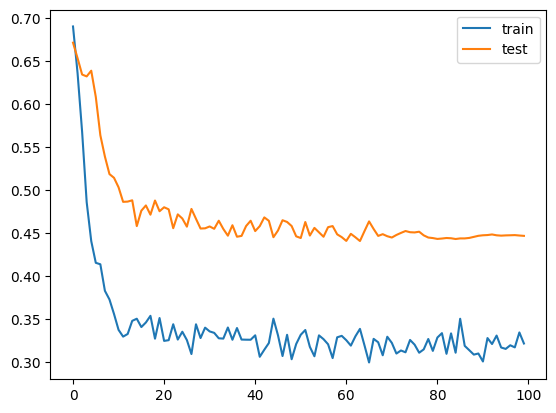

In [26]:
# Tính toán trọng số cho từng lớp
class_counts = np.bincount(y_train.numpy())  # Đếm số lượng mẫu của từng lớp
class_weights = 1.0 / class_counts           # Trọng số ngược với tần suất
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # get the device
class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device) # Move class_weights to the device

model_pro = LSTMPredictor(input_dim, hidden_dim=85, output_dim=output_dim)
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Loss cho bài toán phân loại
optimizer = optim.Adam(model_pro.parameters(), lr=5e-4, weight_decay=1e-3)
train1(model_pro,train_loader=train_loader,test_loader = test_loader,criterion=criterion,optimizer=optimizer,batch_size=128,num_epochs=100)

* Nhận xét: Mô hình hội tụ và không có dấu hiệu overfitting

In [27]:
acc,f1,losses=evaluate_model(model_pro,test_loader)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score (macro): {f1:.4f}")
print(f"Test Loss: {losses:.4f}")

              precision    recall  f1-score   support

           0       0.46      0.98      0.63       161
           1       0.99      0.64      0.78       519

    accuracy                           0.72       680
   macro avg       0.73      0.81      0.70       680
weighted avg       0.87      0.72      0.74       680

Test Accuracy: 0.7235
Test F1 Score (macro): 0.7037
Test Loss: 0.4378


#### Thử nghiệm batch_size

In [28]:
# batch_sizes = [16, 32, 64, 128, 256]
# for batch_size in batch_sizes:
#     print(f"Batch Size: {batch_size}")
#     model_pro = LSTMPredictor(input_dim, hidden_dim=85, output_dim=output_dim)
#     criterion = nn.CrossEntropyLoss(weight=class_weights)  # Loss cho bài toán phân loại
#     optimizer = optim.Adam(model_pro.parameters(), lr=1e-3, weight_decay=5e-4) # Dùng weight decay để tránh overfitting
#     train1(model_pro,train_loader=train_loader,test_loader= test_loader,criterion=criterion,optimizer=optimizer,batch_size=batch_size,num_epochs=100)
#     print("="*100)
#     acc,f1,losses=evaluate_model(model_pro,test_loader=test_loader)
#     print(f"Test Accuracy: {acc:.4f}")
#     print(f"Test F1 Score (macro): {f1:.4f}")
#     print(f"Test Loss: {losses:.4f}")
#     print("="*100)

* Training model với các tham số tối ưu

              precision    recall  f1-score   support

           0       0.38      0.93      0.54       161
           1       0.96      0.53      0.68       519

    accuracy                           0.62       680
   macro avg       0.67      0.73      0.61       680
weighted avg       0.82      0.62      0.65       680

Epoch [1/100], Loss: 0.6971
              precision    recall  f1-score   support

           0       0.33      0.99      0.49       161
           1       0.99      0.37      0.54       519

    accuracy                           0.52       680
   macro avg       0.66      0.68      0.52       680
weighted avg       0.84      0.52      0.53       680

              precision    recall  f1-score   support

           0       0.30      1.00      0.47       161
           1       1.00      0.29      0.45       519

    accuracy                           0.46       680
   macro avg       0.65      0.64      0.46       680
weighted avg       0.84      0.46      0.45   

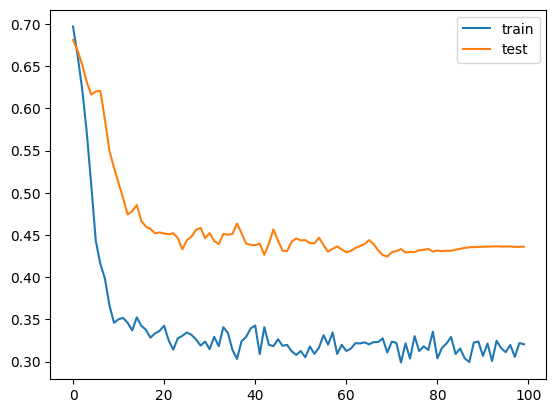

              precision    recall  f1-score   support

           0       0.46      0.98      0.63       161
           1       0.99      0.65      0.78       519

    accuracy                           0.73       680
   macro avg       0.73      0.82      0.71       680
weighted avg       0.87      0.73      0.75       680

Test Accuracy: 0.7279
Test F1 Score (macro): 0.7077
Test Loss: 0.4361


In [29]:
# Tính toán trọng số cho từng lớp
class_counts = np.bincount(y_train.numpy())  # Đếm số lượng mẫu của từng lớp
class_weights = 1.0 / class_counts           # Trọng số ngược với tần suất
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # get the device
class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device) # Move class_weights to the device

model_pro = LSTMPredictor(input_dim, hidden_dim=85, output_dim=output_dim)
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Loss cho bài toán phân loại
optimizer = optim.Adam(model_pro.parameters(), lr=8e-4, weight_decay=5e-4)
train1(model_pro,train_loader=train_loader,test_loader=test_loader,criterion=criterion,optimizer=optimizer,batch_size=256,num_epochs=100)
acc,f1,losses=evaluate_model(model_pro,test_loader= test_loader)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score (macro): {f1:.4f}")
print(f"Test Loss: {losses:.4f}")
print("="*100)

###

### Neural network for ROT prediction

#### ROT MEAN

In [30]:
import pandas as pd

# Tính số lượng mẫu của từng lớp
class_counts = df['Exit-label'].value_counts()
max_count = class_counts.max()

# Tạo một DataFrame mới để lưu dữ liệu đã cân bằng
balanced_df = pd.DataFrame()

# Lặp qua từng lớp và nhân bản mẫu để đạt số lượng bằng max_count
for cls, count in class_counts.items():
    cls_data = df[df['Exit-label'] == cls]
    cls_oversampled = cls_data.sample(n=max_count, replace=True, random_state=42)  # Oversampling
    balanced_df = pd.concat([balanced_df, cls_oversampled])

# Shuffle lại dữ liệu sau khi cân bằng
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Kết quả
print("Số lượng mẫu sau khi cân bằng:")
print(balanced_df['Exit-label'].value_counts())

Số lượng mẫu sau khi cân bằng:
Exit-label
1    2527
0    2527
Name: count, dtype: int64


In [31]:
X,y=balanced_df.drop(['ROT','Exit-label'],axis=1),balanced_df['ROT']
features = ['Exit-location','Exit-angle','Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
X = X[features]

In [32]:
X

,Exit-location,Exit-angle,Final-approach,Aircraft-type,Temperature,Time,Windspeed,Visibility
0,2086.35,30,159,0,30,0,-7,6.0
1,2086.35,30,154,0,31,0,8,8.0
2,2086.35,30,136,2,27,0,8,9.0
3,2086.35,30,140,2,27,0,1,7.0
4,2086.35,30,147,2,31,0,5,6.0
...,...,...,...,...,...,...,...,...
5049,1750.00,30,135,2,25,1,-10,9.0
5050,2086.35,30,150,2,31,0,1,7.0
5051,1750.00,30,141,2,25,0,-1,8.0
5052,1750.00,30,137,2,26,1,-3,6.0


In [33]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa dữ liệu
scaler_rot = StandardScaler()
data_normalized = scaler_rot.fit_transform(X)

num_samples = data_normalized.shape[0]  # Số lượng mẫu dữ liệu

input_dim = data_normalized.shape[1]

X_tensor = torch.tensor(data_normalized,dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Chia tập train/test
train_size = int(0.8 * num_samples)
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]


In [34]:
# 1. Định nghĩa mô hình neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_units):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.gelu = nn.GELU()  # Activation function
        self.fc2 = nn.Linear(hidden_units, hidden_units)  # Output layer for regression
        self.fc3 = nn.Linear(hidden_units, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.gelu(x)
        x = self.fc2(x)
        x = self.gelu(x)
        x = self.fc3(x)
        return x

# 2. Hàm bootstrap sampling
def bootstrap_sample(X, y, sample_size):
    indices = np.random.choice(len(X), size=sample_size, replace=True)
    return X[indices], y[indices]

# 3. Huấn luyện từng mô hình con
def train_single_model(X_train, y_train, input_size, hidden_units, epochs=50, batch_size=32, lr=0.002):
    # Dataloader
    dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Khởi tạo mô hình
    model = NeuralNetwork(input_size, hidden_units)
    model.train()
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr,weight_decay=1e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs*len(dataloader), eta_min=1e-5)
    # Huấn luyện
    for epoch in range(epochs):
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            predictions = model(X_batch).squeeze()
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            scheduler.step()

    return model


In [38]:
# checkpoint_dir= "D:/Runway-Training-main/BE/checkpoint/"
# n_samples = X_tensor.shape[0]
# n_features = X_tensor.shape[1]
# # 5. Tạo và huấn luyện 100 mô hình con
# num_models = 70
# models = []
# input_size = n_features
# hidden_units_list = []
# for i in range(num_models):
#     # Bootstrap sample
#     X_sample, y_sample = bootstrap_sample(X_train, y_train, sample_size=n_samples)
#     # Số lượng hidden units ngẫu nhiên từ 50 đến 700
#     hidden_units = np.random.randint(100, 500)
#     hidden_units_list.append(hidden_units)
#     print(f"Training model {i+1}/{num_models} with {hidden_units} hidden units...")
#     # Huấn luyện mô hình
#     model = train_single_model(X_sample, y_sample, input_size, hidden_units,epochs=50,batch_size = 128, lr= 2e-3)
#     models.append(model)
# checkpoint = {
#     "num_models": num_models,
#     "model_states": [model.state_dict() for model in models],  # trạng thái từng model
#     "hidden_units": hidden_units_list,
#     "input_size": input_size,
#     "scaler":scaler_rot
# }
# torch.save(checkpoint, checkpoint_dir+"ensemble_checkpoint.pth")
# print("✅ Saved ensemble checkpoint to ensemble_checkpoint.pth")
# 6. Dự đoán với ensemble models
def predict_ensemble(models, X_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    X_test_tensor = X_test_tensor.to(device)
    predictions = []
    with torch.no_grad():
        for model in models:
            predictions.append(model(X_test_tensor).cpu().numpy())
    # Trung bình kết quả từ tất cả các mô hình con
    return np.mean(predictions, axis=0),np.var(np.array(predictions),axis=0,ddof=1)


In [ ]:
# Load checkpoint
checkpoint = torch.load("/Users/lap16291/Desktop/RunwayTraining/BE/checkpoint/ensemble_checkpoint.pth", map_location=device,weights_only=False)

num_models = checkpoint["num_models"]
hidden_units_list = checkpoint["hidden_units"]
input_size = checkpoint["input_size"]

# Khởi tạo lại mô hình giống như lúc train và load weight
models = []
for i in range(num_models):
    model = NeuralNetwork(input_size=input_size, hidden_units=hidden_units_list[i]).to(device)  # định nghĩa lớp MLP giống y chang lúc train
    model.load_state_dict(checkpoint["model_states"][i])
    model.eval()
    models.append(model)

print(f"✅ Loaded ensemble with {len(models)} models")

✅ Loaded ensemble with 70 models


In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred,_ = predict_ensemble(loaded_models,X_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

15.396504402160645
3.0921523571014404


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\2860366744.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


#### ROT VARIANCE

##### Predict error variance

In [42]:
class CustomLikelihoodLoss(nn.Module):
    def __init__(self):
        super(CustomLikelihoodLoss, self).__init__()

    def forward(self, y_truth, mean_ROT, variance_ROT, predicted_variance_err):
        # Đảm bảo các tensor được đồng bộ hóa
        mean_ROT = torch.tensor(mean_ROT, device=y_truth.device, dtype=y_truth.dtype)
        predicted_variance_err = torch.nn.functional.softplus(predicted_variance_err)  # Đảm bảo dương

        # Tính residuals bình phương
        r_2 = (mean_ROT - y_truth) ** 2

        # Log của phương sai
        log_variances = torch.log(predicted_variance_err + 1e-6)  # Thêm epsilon

        # Tính loss
        loss = 0.5 * (log_variances + r_2 / (predicted_variance_err + 1e-6))

        # Giá trị trung bình trên batch
        return torch.mean(loss)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_units):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.tanh = nn.Tanh()  # Activation function
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_units,1)   # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.relu(x)
        return x

In [43]:
epochs=50
lr=1e-3
hidden_units = 150
np.random.seed(42)
batch_size=32

dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Khởi tạo mô hình
model_err = NeuralNetwork(input_size, hidden_units)
model_err.train()
model_err.to(device)
criterion = CustomLikelihoodLoss()
optimizer = optim.Adam(model_err.parameters(), lr=lr,weight_decay=1e-3)
losses=[]
# Huấn luyện
for epoch in range(epochs):
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()

        predictions = model_err(X_batch).squeeze()
        mean_ROT,variance_ROT=predict_ensemble(models,X_batch)

        loss = criterion(y_batch,mean_ROT,variance_ROT,predictions)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
print(f"Epoch [{epoch+1}/{epochs}], Loss: {np.mean(losses):.4f}")


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\125843588.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\2860366744.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


Epoch [50/50], Loss: 2.5979


##### Predict on regional data

In [44]:
X,y=df.drop(['ROT','Exit-label'],axis=1),df['ROT']
features = ['Exit-location','Exit-angle','Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
X = X[features]

In [45]:
df

,Exit-location,Aircraft-type,Final-approach,Exit-angle,Temperature,Time,Windspeed,Visibility,ROT,Exit-label
0,2086.35,2,142,30,28,1,-2,7.0,48.0,1
1,2086.35,0,140,30,29,0,-2,9.0,61.0,1
2,2086.35,2,132,30,26,1,-6,10.0,60.0,1
3,1750.00,2,130,30,27,0,7,8.0,58.0,0
4,2086.35,2,144,30,31,0,-9,8.0,54.0,1
...,...,...,...,...,...,...,...,...,...,...
3394,1750.00,2,134,30,33,0,-8,9.0,54.0,0
3395,2086.35,2,141,30,34,0,-6,9.0,55.0,1
3396,2086.35,2,140,30,32,0,-3,7.0,62.0,1
3397,2086.35,0,154,30,26,1,-3,7.0,66.0,1


In [46]:
# Chuẩn hóa dữ liệu
data_normalized = scaler_rot.transform(X)
num_samples = data_normalized.shape[0]  # Số lượng mẫu dữ liệu

input_dim = data_normalized.shape[1]

X_tensor = torch.tensor(data_normalized,dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [47]:
rot_pred,_ = predict_ensemble(models,X_tensor)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\2860366744.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


In [48]:
rot_pred.shape

(3399, 1)

In [49]:
mean_squared_error(y_tensor,rot_pred)

14.790055274963379

In [50]:
df['ROT_pred']=rot_pred

#### Kullback Leibler Divergence

##### create dataset

In [51]:
# Tạo dữ liệu
aircraft_features=['Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
runway_feautures=['Exit-location','Exit-angle']
aircraft_df=df[aircraft_features]
runway_df=df[runway_feautures]

In [52]:
runway_df.drop_duplicates(inplace=True)
# sắp xếp lại theo giá trị của exit location
runway_df.sort_values(by='Exit-location',inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\3970589878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.drop_duplicates(inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\3970589878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.sort_values(by='Exit-location',inplace=True)


In [53]:
runway_df

,Exit-location,Exit-angle
3,1750.00,30
0,2086.35,30


In [54]:
aircraft_df.reset_index(drop=True,inplace=True)
runway_df.reset_index(drop=True,inplace=True)
# Số đặc trưng
n = runway_df.shape[1]
m = aircraft_df.shape[1]

# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (3399, 2, 8)
[[[ 1.75000e+03  3.00000e+01  1.42000e+02 ...  1.00000e+00 -2.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.42000e+02 ...  1.00000e+00 -2.00000e+00
    7.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00 -2.00000e+00
    9.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00 -2.00000e+00
    9.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    1.00000e+01]
  [ 2.08635e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    1.00000e+01]]

 ...

 [[ 1.75000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00 -3.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00 -3.00000e+00
    7.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.54000e+02 ...  1.00000e+00 -3.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.54000e+02 ...  1.00000e+00 -3.00000e+00
    7.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00  1.00

##### evaluate for a landing aircraft

In [55]:
idx_random=np.random.randint(0,len(df))
df_original.loc[idx_random]

Exit-location     2086.35
Aircraft-type       Heavy
Final-approach        159
Exit-angle             30
Temperature            28
Time                Night
Windspeed               1
Visibility            7.0
ROT                  62.0
Exit-label              B
Name: 3174, dtype: object

In [56]:
X_sample = array_3d[idx_random]

X_normalized_pro = scaler_pro.transform(X_sample)
X_normalized_rot = scaler_rot.transform(X_sample)

X_normalized_pro = torch.tensor(X_normalized_pro,dtype=torch.float32)
X_normalized_pro=X_normalized_pro.to(device)

X_normalized_rot = torch.tensor(X_normalized_rot,dtype=torch.float32)
X_normalized_rot=X_normalized_rot.to(device)

means,variances=predict_ensemble(models,X_normalized_rot)
variances_err=model_err(X_normalized_rot).squeeze()
variances_err=variances_err.cpu().detach().numpy()


X_normalized_pro=X_normalized_pro.unsqueeze(0)
_,probabilities = model_pro(X_normalized_pro)
probabilities=probabilities.cpu().detach().numpy()
means=means.squeeze()

d:\Runway-Training-main\BE\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\2860366744.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


In [57]:
print("Probability of random landing aircraft: ",probabilities)
print("Mean ROT of random landing aircraft: ",means)
print("Variance ROT of random landing aircraft: ",variances)
print("Error variance of random landing aircraft: ",variances_err)

Probability of random landing aircraft:  [[0.01441461 0.9855854 ]]
Mean ROT of random landing aircraft:  [54.04559  59.144855]
Variance ROT of random landing aircraft:  [[5.4774623 ]
 [0.19449918]]
Error variance of random landing aircraft:  [30.860905 25.388687]


##### evaluate for Runway

In [58]:
N,seq_len,M=array_3d.shape

data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)

data_normalized_pro=scaler_pro.transform(data_reshaped)
data_normalized_rot = scaler_rot.transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d_pro = data_normalized_pro.reshape(N, seq_len, M)
data_normalized_3d_rot = data_normalized_rot.reshape(N, seq_len, M)

d:\Runway-Training-main\BE\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_tensor_pro = torch.tensor(data_normalized_3d_pro,dtype=torch.float32)
X_tensor_pro=X_tensor_pro.to(device)
X_tensor_rot = torch.tensor(data_normalized_3d_rot,dtype=torch.float32)
X_tensor_rot=X_tensor_rot.to(device)
y_tensor_exit = torch.tensor(df['Exit-label'], dtype=torch.long)  # Cần dtype=torch.long cho CrossEntropyLoss
y_tensor_rot = torch.tensor(df['ROT'], dtype=torch.float32)

In [60]:
array_3d.shape

(3399, 2, 8)

In [61]:
means,variances=predict_ensemble(models,X_tensor_rot)
variances_err=model_err(X_tensor_rot).squeeze()
variances_err=variances_err.cpu().detach().numpy()
variances=variances.squeeze()
variances = variances + variances_err
_,probabilities = model_pro(X_tensor_pro)
probabilities=probabilities.cpu().detach().numpy()
means=means.squeeze()
print(probabilities.shape)
print(variances.shape)
print(means.shape)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\2860366744.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


(3399, 2)
(3399, 2)
(3399, 2)


In [62]:
k=variances.squeeze()
k.shape

(3399, 2)

In [63]:
print(probabilities.shape)
print(variances.shape)
print(means.shape)

(3399, 2)
(3399, 2)
(3399, 2)


In [64]:
mean_ROT = torch.mean(y_tensor_rot).detach().numpy()
std_ROT = torch.std(y_tensor_rot).detach().numpy()

In [65]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
import builtins

def overall_distribution(mean, var, prob):
    """
    Tính mean và var tổng thể của ROT cho toàn bộ sân bay.

    Args:
        mean: numpy array kích thước (N, 3)
        var:  numpy array kích thước (N, 3)
        prob: numpy array kích thước (N, 3)

    Returns:
        overall_mean: float, mean tổng thể
        overall_var: float, var tổng thể
    """
    N = mean.shape[0]  # số lượng máy bay
    # Vì mỗi hàng prob có tổng = 1 nên tổng các trọng số trên toàn bộ dữ liệu là N.
    overall_mean = np.sum(prob * mean) / N
    overall_second_moment = np.sum(prob * (var + mean**2)) / N
    overall_var = overall_second_moment - overall_mean**2
    return overall_mean, np.sqrt(overall_var)

def P_norm(x, mean, std):
    """Calculates the probability density for real ROT."""
    return norm.pdf(x, loc=mean, scale=std)

def kl_divergence_continuous(p_func, y_rot,mean_real,std_real,mean_pred,std_pred):
    """
    Tính KL Divergence giữa hai hàm phân phối P(x) và Q(x) sử dụng numpy.

    Args:
        p_func (function): Hàm phân phối thực P(x).
        q_func (function): Hàm phân phối dự đoán Q(x).
        x_range (tuple): Miền giá trị của x, ví dụ: (a, b).
        num_samples (int): Số mẫu để lấy x trong khoảng [a, b].

    Returns:
        float: Giá trị KL Divergence.
    """
    # Lấy mẫu x đều trong khoảng x_range


    # Tính giá trị P(x) và Q(x)
    p = p_func(y_rot,mean_real,std_real)
    q = p_func(y_rot,mean_pred,std_pred)

    # Đảm bảo P(x) và Q(x) là xác suất hợp lệ (tổng tích phân ~ 1)
    p = p / np.sum(p)
    q = q / np.sum(q)

    # Thêm epsilon để tránh log(0) hoặc chia cho 0
    epsilon = 1e-10
    p = p + epsilon
    q = q + epsilon

    # Tính KL Divergence: sum(P(x) * log(P(x) / Q(x)))
    kl = np.sum(p * np.log(p / q))
    return kl
overall_mean, overall_std = overall_distribution(means, variances, probabilities)
print(f"Overall Mean: {overall_mean}")
print(f"Overall Variance: {overall_std}")
kl_value=kl_divergence_continuous(P_norm, df['ROT'],mean_ROT, std_ROT,overall_mean,overall_std)
print(f"KL Divergence: {kl_value}")

Overall Mean: 57.30508804321289
Overall Variance: 6.328491687774658
KL Divergence: 0.015632402150736656


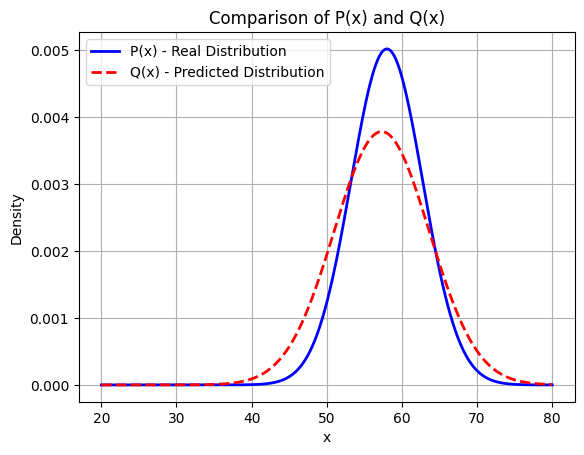

In [66]:
def plot_two_distributions(p_func,mean_real,std_real,mean_pred,std_pred,x_range, num_points=1000):
    """
    Vẽ hai đường phân phối P(x) và Q(x).

    Args:
        p_func (function): Hàm phân phối P(x).
        q_func (function): Hàm phân phối Q(x).
        x_range (tuple): Miền giá trị x để vẽ các đường phân phối.
        num_points (int): Số điểm để tính giá trị của P(x) và Q(x).
    """
    # Tạo miền giá trị x
    x = np.linspace(x_range[0], x_range[1], num_points)


    # Tính giá trị của P(x) và Q(x)
    p_values = p_func(x,mean_real,std_real)
    q_values = p_func(x,mean_pred,std_pred)

    # Đảm bảo P(x) và Q(x) là xác suất hợp lệ (tổng tích phân ~ 1)
    p_values = p_values / np.sum(p_values)
    q_values = q_values / np.sum(q_values)

    # Vẽ đường phân phối P(x)
    plt.plot(x, p_values, label="P(x) - Real Distribution", color="blue", linewidth=2)

    # Vẽ đường phân phối Q(x)
    plt.plot(x, q_values, label="Q(x) - Predicted Distribution", color="red", linestyle="--", linewidth=2)

    # Thêm nhãn và tiêu đề
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Comparison of P(x) and Q(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
x_range=[20,80]
plot_two_distributions(P_norm,mean_ROT, std_ROT,overall_mean,overall_std,x_range, num_points=1000)


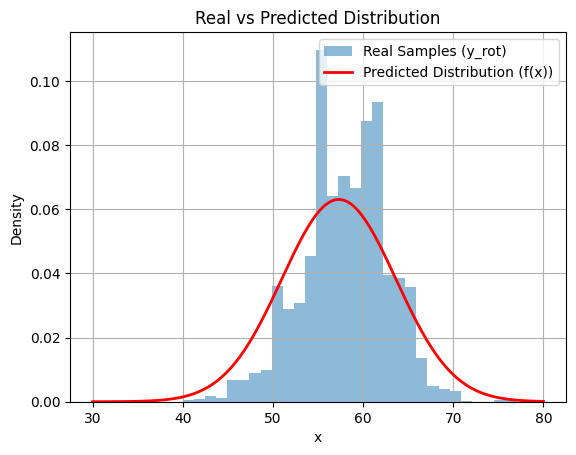

In [67]:
def plot_distribution(y_rot, f_func, x_range,mean_pred,std_pred, num_points=1000, bins=30):
    """
    Vẽ phân phối thực tế từ mẫu y_rot và đường phân phối dự đoán từ f(x).

    Args:
        y_rot (array-like): Mẫu thực tế.
        f_func (function): Hàm phân phối dự đoán f(x).
        x_range (tuple): Miền giá trị x để vẽ đường dự đoán.
        num_points (int): Số điểm để tính giá trị của f(x).
        bins (int): Số lượng bins trong histogram.
    """
    # tạo miền giá trị x
    x = np.linspace(x_range[0], x_range[1], num_points)
    # Tính giá trị của hàm phân phối dự đoán f(x)
    f_values = f_func(x,mean_pred,std_pred)
    f_values /= (np.sum(f_values) * np.diff(x[:2]))

    # Vẽ histogram của y_rot (mẫu thực tế)
    plt.hist(y_rot, bins=bins, density=True, alpha=0.5, label="Real Samples (y_rot)")

    # Vẽ đường phân phối dự đoán f(x)
    plt.plot(x, f_values, label="Predicted Distribution (f(x))", color="red", linewidth=2)

    # Thêm nhãn và tiêu đề
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Real vs Predicted Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()

x_range=[30,80]
plot_distribution(df['ROT'], P_norm, x_range,overall_mean,overall_std, num_points=1000, bins=30)

### RECOMMENDATION

#### Data Preparing

In [68]:
def aggregate_rot_statistics(mean, var, prob):
    """
    Tính mean và var tổng hợp của ROT cho từng lối thoát.

    Args:
        mean: numpy array kích thước (N, 3), chứa mean ROT của N máy bay cho 3 lối thoát.
        var:  numpy array kích thước (N, 3), chứa phương sai ROT của N máy bay cho 3 lối thoát.
        prob: numpy array kích thước (N, 3), chứa xác suất sử dụng 3 lối thoát của N máy bay.

    Returns:
        aggregated_mean: numpy array kích thước (3,), mean tổng hợp cho từng lối thoát.
        aggregated_var:  numpy array kích thước (3,), var tổng hợp cho từng lối thoát.
    """
    num_exits = mean.shape[1]

    aggregated_mean = np.zeros(num_exits)
    aggregated_var = np.zeros(num_exits)

    for j in range(num_exits):
        # Lấy trọng số (xác suất) cho lối thoát j của tất cả máy bay
        weights = prob[:, j]
        total_weight = np.sum(weights)

        # Tính mean tổng hợp cho lối thoát j (trung bình trọng số)
        mu_j = np.sum(weights * mean[:, j]) / total_weight
        aggregated_mean[j] = mu_j

        # Tính second moment của hỗn hợp:
        second_moment = np.sum(weights * (var[:, j] + mean[:, j]**2)) / total_weight

        # Phương sai tổng hợp: E[X^2] - (E[X])^2
        aggregated_var[j] = second_moment - mu_j**2

    return aggregated_mean, aggregated_var

In [69]:
exit_mean, exit_var = aggregate_rot_statistics(means, variances, probabilities)
print(f"Exit Mean: {exit_mean}")
print(f"Exit Std: {np.sqrt(exit_var)}")

Exit Mean: [55.37869263 59.18906784]
Exit Std: [6.30766368 5.75558068]


In [70]:
print("Predicted:")
print("Exit use: ",np.mean(probabilities,axis=0).T)
print("ROT Means: ",exit_mean)

Predicted:
Exit use:  [0.49443188 0.50556827]
ROT Means:  [55.37869263 59.18906784]


In [71]:
# Gỉa sử các phân phối của từng lối thoát là phân phối chuẩn
# Lấy khoảng tin cậy là 99,5% thì alpha= 2.575
alpha = 3.1
n = len(df)
range_lower = exit_mean - alpha * np.sqrt(exit_var/n)
range_upper = exit_mean + alpha * np.sqrt(exit_var/n)
range_value= [range_lower,range_upper]
print(f"Range of Values: {range_value}")

Range of Values: [array([55.04329913, 58.88302991]), array([55.71408613, 59.49510577])]


In [72]:
# tạo dataframe riêng cho từng lối thoát
df_A=df[df['Exit-label']==0]
df_B=df[df['Exit-label']==1]

df_B['Exit-label']=2

# Lọc ra những mẫu có ROT lớn hơn range_value ở B, xóa những dòng đó
out_B=df_B[(df_B['ROT']>range_value[1][1])]
# Xóa những giá trị đó có trong df
#df_A.drop(out_A.index,inplace=True)
df_B.drop(out_B.index,inplace=True)
df_A.reset_index(drop=True,inplace=True)
df_B.reset_index(drop=True,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\943946870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B['Exit-label']=2
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\943946870.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B.drop(out_B.index,inplace=True)


In [73]:
len(out_B) 

1192

In [74]:
#new_df=pd.concat([out_A,out_B])
new_df=out_B
new_df['Exit-angle']=30
new_df['Exit-location']=1850    # thay số vd: 1800, 1850, 1900, 1950, 2000
new_df['Exit-label']=1
new_df.reset_index(drop=True,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\341569546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Exit-angle']=30
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\341569546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Exit-location']=1850    # thay số vd: 1800, 1850, 1900, 1950, 2000
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\341569546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [75]:
new_df=pd.concat([df_A,df_B,new_df])
new_df.reset_index(drop=True,inplace=True)

In [76]:
new_df['Exit-label'].value_counts()

Exit-label
2    1335
1    1192
0     872
Name: count, dtype: int64

#### RETRAIN RECURRENT NEURAL NETWORK for exit use

In [77]:
# Tạo dữ liệu
new_df = new_df.sample(frac=1).reset_index(drop=True)
aircraft_features=['Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
runway_feautures=['Exit-location','Exit-angle']
aircraft_df=new_df[aircraft_features]
runway_df=new_df[runway_feautures]

In [78]:
runway_df.drop_duplicates(inplace=True)
# sắp xếp lại theo giá trị của exit location
runway_df.sort_values(by='Exit-location',inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\3970589878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.drop_duplicates(inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\3970589878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.sort_values(by='Exit-location',inplace=True)


In [79]:
runway_df

,Exit-location,Exit-angle
0,1750.00,30
8,1850.00,30
2,2086.35,30


In [80]:
aircraft_df.reset_index(drop=True,inplace=True)
runway_df.reset_index(drop=True,inplace=True)
# Số đặc trưng
n = runway_df.shape[1]
m = aircraft_df.shape[1]

# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (3399, 3, 8)
[[[ 1.75000e+03  3.00000e+01  1.44000e+02 ...  0.00000e+00 -6.00000e+00
    8.00000e+00]
  [ 1.85000e+03  3.00000e+01  1.44000e+02 ...  0.00000e+00 -6.00000e+00
    8.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.44000e+02 ...  0.00000e+00 -6.00000e+00
    8.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.43000e+02 ...  0.00000e+00  1.00000e+00
    7.00000e+00]
  [ 1.85000e+03  3.00000e+01  1.43000e+02 ...  0.00000e+00  1.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.43000e+02 ...  0.00000e+00  1.00000e+00
    7.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    4.00000e+00]
  [ 1.85000e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    4.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    4.00000e+00]]

 ...

 [[ 1.75000e+03  3.00000e+01  1.34000e+02 ...  1.00000e+00 -8.00000e+00
    1.00000e+01]
  [ 1.85000e+03  3.00000e+01  1.34000e+02 ...  1.00000e+00 -8.00000e

In [81]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
N,seq_len,M=array_3d.shape
data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)
scaler_pro= StandardScaler()
# Chuẩn hóa dữ liệu
data_normalized = scaler_pro.fit_transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d = data_normalized.reshape(N, seq_len, M)


In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


num_samples = N  # Số lượng mẫu dữ liệu
seq_len = data_normalized_3d.shape[1]  # Độ dài chuỗi
input_dim = data_normalized_3d.shape[2]  # Số đặc trưng mỗi bước
output_dim = data_normalized_3d.shape[1]  # Số lớp cần phân loại
batch_size = 32  # Kích thước batch

X_tensor = torch.tensor(data_normalized_3d,dtype=torch.float32)
y_tensor = torch.tensor(new_df['Exit-label'].values, dtype=torch.long)  # Cần dtype=torch.long cho CrossEntropyLoss

# Chia tập train/test
train_size = int(0.8 * num_samples)
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# Tạo DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

class_counts = np.bincount(y_train.numpy())
class_weights = 1.0 / class_counts
weights = class_weights[y_train.numpy()]

# Tạo sampler
sampler = torch.utils.data.WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

# Tạo DataLoader với sampler
train_loader = DataLoader(train_dataset, batch_size=batch_size,sampler=sampler)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [83]:
data_normalized_3d.shape

(3399, 3, 8)

              precision    recall  f1-score   support

           0       0.41      0.96      0.58       163
           1       0.60      0.60      0.60       248
           2       0.75      0.14      0.24       269

    accuracy                           0.50       680
   macro avg       0.59      0.57      0.47       680
weighted avg       0.61      0.50      0.45       680

Epoch [1/50], Loss: 1.0197
              precision    recall  f1-score   support

           0       0.52      0.87      0.65       163
           1       0.62      0.67      0.64       248
           2       0.66      0.34      0.45       269

    accuracy                           0.59       680
   macro avg       0.60      0.63      0.58       680
weighted avg       0.61      0.59      0.57       680

              precision    recall  f1-score   support

           0       0.49      0.93      0.64       163
           1       0.58      0.67      0.62       248
           2       0.68      0.21      0.32     

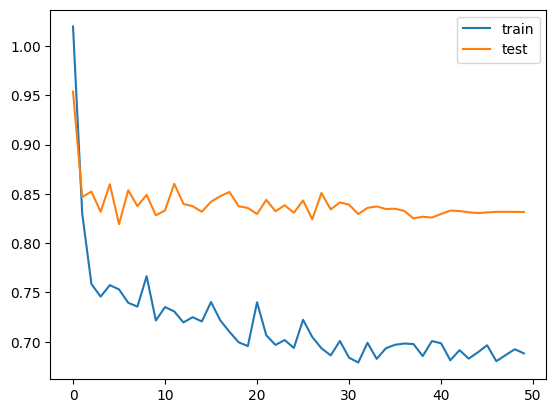

In [ ]:
# Tính toán trọng số cho từng lớp
class_counts = np.bincount(y_train.numpy())  # Đếm số lượng mẫu của từng lớp
class_weights = 1.0 / class_counts           # Trọng số ngược với tần suất
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # get the device
class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device) # Move class_weights to the device

new_model_pro = LSTMPredictor(input_dim, hidden_dim=85, output_dim=output_dim)
criterion = nn.CrossEntropyLoss(weight = class_weights)  # Loss cho bài toán phân loại
optimizer = optim.Adam(new_model_pro.parameters(), lr=5e-3,weight_decay=5e-4)
train1(new_model_pro,train_loader=train_loader,test_loader=test_loader,criterion=criterion,optimizer=optimizer,batch_size=256,num_epochs=50)

checkpoint = {
    "model_states": new_model_pro.state_dict(),  # trạng thái từng model
    "hidden_dim": 85,
    "input_dim": input_dim,
    "scaler" : scaler_pro
}
torch.save(checkpoint, "/Users/lap16291/Desktop/RunwayTraining/BE/checkpoint/RNN_checkpoint.pth")

In [ ]:
checkpoint = torch.load("/Users/lap16291/Desktop/RunwayTraining/BE/checkpoint/RNN_checkpoint.pth", map_location=torch.device('cpu'),weights_only=False)
L = LSTMPredictor(input_dim= checkpoint['input_dim'],hidden_dim=checkpoint['hidden_dim'],output_dim=3)
L.load_state_dict(checkpoint["model_states"])
scaler_pro = checkpoint["scaler"]
L.eval()

LSTMPredictor(
  (lstm): LSTM(8, 85, batch_first=True)
  (fc): Linear(in_features=85, out_features=3, bias=True)
  (softmax): Softmax(dim=-1)
)

In [ ]:
checkpoint = torch.load("/Users/lap16291/Desktop/RunwayTraining/BE/checkpoint/RNN_checkpoint.pth", map_location=torch.device('cpu'),weights_only=False)

In [87]:
checkpoint

{'model_states': OrderedDict([('lstm.weight_ih_l0',
               tensor([[-1.0579e-03, -6.0967e-14, -1.2514e-01,  ...,  9.6411e-02,
                        -4.3459e-01,  3.0161e-01],
                       [-1.3223e-03, -2.9376e-15, -3.3002e-02,  ...,  3.7932e-03,
                        -1.8285e-02,  3.2123e-02],
                       [ 3.9363e-02, -1.4284e-14, -8.1925e-02,  ...,  7.3124e-02,
                         7.4730e-02,  5.6899e-02],
                       ...,
                       [ 2.4511e-01, -1.7582e-13,  7.6061e-02,  ..., -5.7481e-02,
                         2.2640e-01, -1.7622e-01],
                       [ 7.1390e-02, -4.2975e-13,  1.0671e-01,  ...,  1.8793e-02,
                         1.5193e-01,  1.4615e-01],
                       [ 7.0166e-02,  1.0604e-13, -6.7799e-02,  ..., -1.8567e-01,
                        -7.4903e-02,  3.4756e-01]])),
              ('lstm.weight_hh_l0',
               tensor([[ 0.0480, -0.0220, -0.0123,  ..., -0.0090, -0.0267,  0.0623]

In [88]:
acc,f1,losses=evaluate_model(new_model_pro,test_loader)
print(f"Accuracy: {acc}")
print(f"F1-score: {f1}")
print(f"Loss: {losses}")

              precision    recall  f1-score   support

           0       0.51      0.88      0.65       163
           1       0.63      0.61      0.62       248
           2       0.65      0.38      0.48       269

    accuracy                           0.59       680
   macro avg       0.60      0.63      0.58       680
weighted avg       0.61      0.59      0.57       680

Accuracy: 0.5852941176470589
F1-score: 0.582533058167087
Loss: 0.830180742523887


#### Evaluation

In [89]:
# Tạo dữ liệu
aircraft_features=['Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
runway_feautures=['Exit-location','Exit-angle']
aircraft_df=new_df[aircraft_features]
runway_df=new_df[runway_feautures]

In [90]:
runway_df.drop_duplicates(inplace=True)
# sắp xếp lại theo giá trị của exit location
runway_df.sort_values(by='Exit-location',inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\3970589878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.drop_duplicates(inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\3970589878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.sort_values(by='Exit-location',inplace=True)


In [91]:
runway_df

,Exit-location,Exit-angle
0,1750.00,30
8,1850.00,30
2,2086.35,30


In [92]:
aircraft_df.reset_index(drop=True,inplace=True)
runway_df.reset_index(drop=True,inplace=True)
# Số đặc trưng
n = runway_df.shape[1]
m = aircraft_df.shape[1]

# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (3399, 3, 8)
[[[ 1.75000e+03  3.00000e+01  1.44000e+02 ...  0.00000e+00 -6.00000e+00
    8.00000e+00]
  [ 1.85000e+03  3.00000e+01  1.44000e+02 ...  0.00000e+00 -6.00000e+00
    8.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.44000e+02 ...  0.00000e+00 -6.00000e+00
    8.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.43000e+02 ...  0.00000e+00  1.00000e+00
    7.00000e+00]
  [ 1.85000e+03  3.00000e+01  1.43000e+02 ...  0.00000e+00  1.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.43000e+02 ...  0.00000e+00  1.00000e+00
    7.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    4.00000e+00]
  [ 1.85000e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    4.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.32000e+02 ...  1.00000e+00 -6.00000e+00
    4.00000e+00]]

 ...

 [[ 1.75000e+03  3.00000e+01  1.34000e+02 ...  1.00000e+00 -8.00000e+00
    1.00000e+01]
  [ 1.85000e+03  3.00000e+01  1.34000e+02 ...  1.00000e+00 -8.00000e

In [93]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
N,seq_len,M=array_3d.shape
data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)
# Chuẩn hóa dữ liệu
data_normalized_pro = scaler_pro.transform(data_reshaped)
data_normalized_rot = scaler_rot.transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d_pro = data_normalized_pro.reshape(N, seq_len, M)
data_normalized_3d_rot = data_normalized_rot.reshape(N, seq_len, M)

d:\Runway-Training-main\BE\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [94]:
data_normalized_3d_pro.shape

(3399, 3, 8)

In [95]:
X_tensor_pro = torch.tensor(data_normalized_3d_pro,dtype=torch.float32)
X_tensor_pro = X_tensor_pro.to(device)
X_tensor_rot = torch.tensor(data_normalized_3d_rot,dtype=torch.float32)
X_tensor_rot = X_tensor_rot.to(device)
y_tensor_exit = torch.tensor(new_df['Exit-label'].values, dtype=torch.long)  # Cần dtype=torch.long cho CrossEntropyLoss
y_tensor_rot = torch.tensor(new_df['ROT'].values, dtype=torch.float32)

In [96]:
X_tensor_pro.shape

torch.Size([3399, 3, 8])

In [97]:
means,variances=predict_ensemble(models,X_tensor_rot)
variances_err=model_err(X_tensor_rot).squeeze()
variances_err=variances_err.cpu().detach().numpy()
variances=variances.squeeze()
variances = variances + variances_err
_,probabilities = new_model_pro(X_tensor_pro)
probabilities=probabilities.cpu().detach().numpy()
means=means.squeeze()
print(probabilities.shape)
print(variances.shape)
print(means.shape)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\2860366744.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


(3399, 3)
(3399, 3)
(3399, 3)


In [98]:
new_overall_mean,new_overall_std=overall_distribution(means, variances, probabilities)
print(f"Overall Mean: {new_overall_mean}")
print(f"Overall std: {new_overall_std}")

Overall Mean: 55.90769958496094
Overall std: 6.330420017242432


In [99]:
print(f"Overall Mean: {overall_mean}")
print(f"Overall std: {overall_std}")

Overall Mean: 57.30508804321289
Overall std: 6.328491687774658


In [100]:
# lọc ROT theo từng "exit-label"
means_A = means[new_df['Exit-label'].values == 0]
variances_A = variances[new_df['Exit-label'].values == 0]
probabilities_A = probabilities[new_df['Exit-label'].values == 0]

In [101]:
k,l=aggregate_rot_statistics(means, variances, probabilities)
print(f"Exit Mean: {k}")
print(f"Exit Std: {np.sqrt(l)}")

Exit Mean: [55.13309097 54.67276001 58.21295166]
Exit Std: [6.19767156 6.4980278  5.62250379]


In [102]:
print("probability of each exit: ",np.mean(probabilities,axis=0).T)

probability of each exit:  [0.33627775 0.3586139  0.30510762]


##### REAL

In [103]:
print("Real ROT:",mean_ROT)

Real ROT: 57.998825


In [104]:
# Tính tần suất
tansuat = df['Exit-label'].value_counts()
# Tính tần suất và tỷ lệ phần trăm
tansuat_phantram = df['Exit-label'].value_counts(normalize=True)

print(tansuat_phantram)

Exit-label
1    0.743454
0    0.256546
Name: proportion, dtype: float64


In [105]:
# Tính trung bình của ROT cho từng loại Exit-label
trung_binh_ROT = df.groupby('Exit-label')['ROT'].mean()

print(trung_binh_ROT)

Exit-label
0    55.053899
1    59.015038
Name: ROT, dtype: float64


#### Test

In [106]:
aircraft_type_map = {
    "Heavy": 0,
    "Light":1,
    "Medium":2
}
time_map = {
    "Day":0,
    "Night":1
}
def preprocess_df(df):
    df['Aircraft-type'] = df['Aircraft-type'].map(aircraft_type_map)
    df['Time'] = df['Time'].map(time_map)  
    return df 

runway_df = {
    'Exit-location':[1750,1950,2086.35],
    'Exit-angle':[30,30,30],
}


aircraft_df = {
    'Final-approach':[150],
    'Aircraft-type':["Medium"],
    'Temperature':[30],
    'Time':["Night"],
    'Windspeed':[2],
    'Visibility':[9.0]
}

aircraft_df = preprocess_df(pd.DataFrame(aircraft_df))
runway_df = pd.DataFrame(runway_df)
# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (1, 3, 8)
[[[1.75000e+03 3.00000e+01 1.50000e+02 2.00000e+00 3.00000e+01
   1.00000e+00 2.00000e+00 9.00000e+00]
  [1.95000e+03 3.00000e+01 1.50000e+02 2.00000e+00 3.00000e+01
   1.00000e+00 2.00000e+00 9.00000e+00]
  [2.08635e+03 3.00000e+01 1.50000e+02 2.00000e+00 3.00000e+01
   1.00000e+00 2.00000e+00 9.00000e+00]]]


In [107]:
N,seq_len,M=array_3d.shape
data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)
# Chuẩn hóa dữ liệu
data_normalized_pro = scaler_pro.transform(data_reshaped)
data_normalized_rot = scaler_rot.transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d_pro = data_normalized_pro.reshape(N, seq_len, M)
data_normalized_3d_rot = data_normalized_rot.reshape(N, seq_len, M)

X_tensor_pro = torch.tensor(data_normalized_3d_pro,dtype=torch.float32)
X_tensor_pro = X_tensor_pro.to(device)
X_tensor_rot = torch.tensor(data_normalized_3d_rot,dtype=torch.float32)
X_tensor_rot = X_tensor_rot.to(device)

d:\Runway-Training-main\BE\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [108]:
means,variances=predict_ensemble(models,X_tensor_rot)
_,probabilities = new_model_pro(X_tensor_pro)
probabilities=probabilities.cpu().detach().numpy()
means=means.squeeze()
best_index = np.argmax(probabilities)
print("Xác suất sử dụng lối thoát thứ {}, là: {}".format(best_index+1,probabilities[0][best_index]))
print("ROT trung bình khi sử dụng lối thoát thứ {} là: {}".format(best_index+1,means[best_index]))

Xác suất sử dụng lối thoát thứ 2, là: 0.8309297561645508
ROT trung bình khi sử dụng lối thoát thứ 2 là: 55.98927688598633


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6444\2860366744.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
